# MELODI Presto Analysis Example

In [1]:
import json
import pandas as pd
import requests
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np

## Configure parameters

In [2]:
API_URL = "https://melodi-presto.mrcieu.ac.uk/api/"
#API_URL = "http://localhost:8000/api/"

requests.get(f"{API_URL}/status").json()

True

### Set up some functions

In [3]:
#overlap
def overlap(q1,q2):
    endpoint = "/overlap/"
    url = f"{API_URL}{endpoint}"
    params = {
        "x": q1,
        "y": q2,
    }
    response = requests.post(url, data=json.dumps(params))
    res = response.json()
    if 'data' in res:
        overlap_df = (    
            pd.json_normalize(res['data'])
        )
    else:
        overlap_df=pd.DataFrame()
    #overlap_df
    return overlap_df

### COVID-19 risk factors



In [7]:
q1=['risk factors']
q2=['covid-19','coronavirus']

overlap_df = overlap(q1,q2)

AttributeError: module 'pandas' has no attribute 'json_normalize'

In [17]:
overlap_counts = overlap_df.groupby(['set_y','object_type_x'])['object_name_x'].value_counts()
overlap_counts

set_y        object_type_x  object_name_x                       
coronavirus  dsyn           Infection                               484
                            Diabetes                                220
                            Hypertensive disease                     99
                            Pneumonia                                50
                            Acute myocardial infarction              18
                            Respiratory Distress Syndrome, Adult      9
                            Inflammatory Bowel Diseases               6
                            Syndrome                                  5
                            Septicemia                                3
                            Autoimmune Diseases                       2
             gngm           Cyclosporine                              1
                            Phosphotransferases                       1
covid-19     dsyn           Hypertensive disease                    297

### COVID-19 risk factors
Factors associated with hospitalization and critical illness among 4,103 patients with COVID-19 disease in New York City:

https://www.medrxiv.org/content/10.1101/2020.04.08.20057794v1

In [44]:
q1=['C-reactive protein','ferritin','d-dimer']
q2=['covid-19','coronavirus']

overlap_df = overlap(q1,q2)

,triple_x,subject_name_x,subject_type_x,subject_id_x,predicate_x,object_name_x,object_type_x,object_id_x,localCount_x,localTotal_x,...,object_type_y,object_id_y,localCount_y,localTotal_y,globalCount_y,globalTotal_y,odds_y,pval_y,pmids_y,set_y
0,C-reactive protein:PREDISPOSES:Cardiovascular ...,C-reactive protein,aapp,C0006560,PREDISPOSES,Cardiovascular Diseases,dsyn,C0007222,282,62335,...,dsyn,C5203670,2,740,2,6862606,9298.921409,6.960000e-08,32281055 32304798,covid-19
1,C-reactive protein:ASSOCIATED_WITH:Cardiovascu...,C-reactive protein,aapp,C0006560,ASSOCIATED_WITH,Cardiovascular Diseases,dsyn,C0007222,169,62335,...,dsyn,C5203670,2,740,2,6862606,9298.921409,6.960000e-08,32281055 32304798,covid-19
2,Metabolic syndrome:PREDISPOSES:Cardiovascular ...,Metabolic syndrome,dsyn,C0948265,PREDISPOSES,Cardiovascular Diseases,dsyn,C0007222,73,62335,...,dsyn,C5203670,2,740,2,6862606,9298.921409,6.960000e-08,32281055 32304798,covid-19
3,Obesity:PREDISPOSES:Cardiovascular Diseases,Obesity,dsyn,C0028754,PREDISPOSES,Cardiovascular Diseases,dsyn,C0007222,46,62335,...,dsyn,C5203670,2,740,2,6862606,9298.921409,6.960000e-08,32281055 32304798,covid-19
4,Hypertensive disease:PREDISPOSES:Cardiovascula...,Hypertensive disease,dsyn,C0020538,PREDISPOSES,Cardiovascular Diseases,dsyn,C0007222,35,62335,...,dsyn,C5203670,2,740,2,6862606,9298.921409,6.960000e-08,32281055 32304798,covid-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872,Ferritin:INTERACTS_WITH:Monoclonal Antibodies,Ferritin,aapp,C0015879,INTERACTS_WITH,Monoclonal Antibodies,aapp,C0003250,3,16878,...,aapp,C0065827,2,4335,2,6862606,1583.799677,2.388600e-06,30877355,coronavirus
873,Septicemia:CAUSES:Blood Coagulation Disorders,Septicemia,dsyn,C0036690,CAUSES,Blood Coagulation Disorders,dsyn,C0005779,8,5356,...,dsyn,C5203670,3,740,3,6862606,9311.537313,0.000000e+00,32302442 32302462,covid-19
874,Pulmonary Embolism:NEG_COEXISTS_WITH:Blood Coa...,Pulmonary Embolism,dsyn,C0034065,NEG_COEXISTS_WITH,Blood Coagulation Disorders,dsyn,C0005779,2,5356,...,dsyn,C5203670,3,740,3,6862606,9311.537313,0.000000e+00,32302442 32302462,covid-19
875,Chronic Obstructive Airway Disease:COEXISTS_WI...,Chronic Obstructive Airway Disease,dsyn,C0024117,COEXISTS_WITH,Respiratory Failure,dsyn,C1145670,7,5356,...,dsyn,C5203670,3,740,3,6862606,9311.537313,0.000000e+00,32299776 32277836 32320677,covid-19


In [51]:
overlap_counts = overlap_df.groupby(['set_x','set_y','object_type_x'])['object_name_x'].value_counts()
overlap_counts.to_csv('test.csv')

### Psoriasis

https://www.cell.com/ajhg/fulltext/S0002-9297(12)00157-7

In [18]:
q1=['AP1S3','IL36RN','CARD14']
q2=['Psoriasis']

overlap_df = overlap(q1,q2)

In [19]:
overlap_counts = overlap_df.groupby(['set_x','object_type_x'])['object_name_x'].value_counts()
overlap_counts

set_x   object_type_x  object_name_x                
ap1s3   gngm           CARD14                             5
card14  aapp           NF-kappa B                         3
        dsyn           Psoriasis                        861
                       Autoimmune Diseases               10
                       skin disorder                      8
        gngm           NF-kappa B                        21
                       CARD14                             5
il36rn  aapp           Interleukin Receptor               1
        dsyn           Arthritis, Psoriatic              33
                       Pustulosis of Palms and Soles      3
        gngm           CARD14                             5
                       Interleukin Receptor               1
Name: object_name_x, dtype: int64

### Drug repurposing

https://www.medrxiv.org/content/10.1101/2020.05.07.20093286v1

In [20]:
q1=['DHODH', 'ITGB5', 'JAK2']
q2=['Leflunomide','Cilengitide','Baricitinib']

overlap_df = overlap(q1,q2)

In [21]:
overlap_counts = overlap_df.groupby(['set_x','set_y','object_type_x'])['object_name_x'].value_counts()
overlap_counts

set_x  set_y        object_type_x  object_name_x                     
dhodh  leflunomide  aapp           Phosphotransferases                    1
                    dsyn           Rheumatoid Arthritis                   9
                    gngm           Dihydroorotate dehydrogenase          50
                                   Dihydroorotate dehydrogenase|DHODH     1
                    orch           leflunomide                           92
                                   Pyrimidine                            12
jak2   baricitinib  aapp           Janus kinase                           4
                                   Janus kinase 1|JAK1                    4
                                   cytokine                               3
                    gngm           Janus kinase                          11
                                   Janus kinase 1|JAK1                    4
                                   cytokine                               1
                  

### Other drug repurposing

https://www.nature.com/articles/nrd.2018.168/tables/1lo

In [22]:
q1=['(Ketoconazole) AND (("1900"[Date - Create] : "2000"[Date - Create]))']
q2=['(Cushing syndrome) AND (("1900"[Date - Create] : "2000"[Date - Create]))']

overlap_df = overlap(q1,q2)

In [23]:
overlap_counts = overlap_df.groupby(['object_type_x'])['object_name_x'].value_counts()
overlap_counts

object_type_x  object_name_x                  
aapp           Corticotropin|POMC                  62
               Glucocorticoid Receptor              1
dsyn           Cushing Syndrome                    36
               Hypertensive disease                 6
               Adrenal Gland Hyperfunction          3
               Infection                            3
               Mycoses                              3
               Adrenal gland hypofunction           1
               Histoplasmosis                       1
gngm           Corticotropin|POMC                  31
               Corticotropin-Releasing Hormone     20
horm           Hydrocortisone                     138
               Adrenal Cortex Hormones             14
               Testosterone                        14
               Corticotropin                       13
               Androgens                            6
               Estradiol                            2
               Steroid hormone     

### Changes over time

Loop through 20 years and look at change

Note, the enrichment values here are not reliable, as totals are based on all data, not year restricted counts

In [65]:
#
year_range=range(1980,2021)
#year_range=range(1990,1995)

master_df=pd.DataFrame()

#qterm1='Ketoconazole'
#qterm2='Cushing syndrome'

qterm1='Rituximab'
qterm2='Rheumatoid arthritis'

#qterm1='Vitamin D'
#qterm2='Prostate cancer'

#qterm1='Fingolimod'
#qterm2='Multiple sclerosis'

#qterm1='Carnitine'
#qterm2='Pancreatic cancer'

#qterm1='ERG'
#qterm2='Prostate cancer'

qterm1="Coffee consumption"
qterm2="Breast cancer"

#qterm1='Dapoxetine'
#qterm2='Premature ejaculation'
#this example highlights an issue with SemMedDB, it identifies the gene SLC4A1 but is mistaken, perhaps for the text DI. 
#interestingly manual run of SemRep does not find this relationship


for y in year_range:
    q1=['('+qterm1+') AND (("1900"[Date - Create] : "'+str(y).zfill(2)+'"[Date - Create]))']
    q2=['('+qterm2+') AND (("1900"[Date - Create] : "'+str(y).zfill(2)+'"[Date - Create]))']
    print(y)
    overlap_df = overlap(q1,q2)
    if overlap_df.empty:
        continue;
    overlap_counts = overlap_df.groupby(['object_type_x'])['object_name_x'].value_counts()
    overlap_counts_df = overlap_counts.rename_axis(['type','name']).reset_index(name='counts').sort_values(by='counts',ascending=False)
    #add year
    overlap_counts_df['year']=y
    #add relative counts
    overlap_counts_df['rel_counts']=(overlap_counts_df['counts']/sum(overlap_counts_df['counts']))*100
    print(overlap_counts_df.shape)
    print(overlap_counts_df.head())
    master_df = master_df.append(overlap_counts_df)
    
print(master_df)

1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
(1, 5)
   type    name  counts  year  rel_counts
0  orch  Folate       1  2001       100.0
2002
2003
2004
2005
2006
2007
(2, 5)
   type                       name  counts  year  rel_counts
0  aapp                    Insulin       2  2007   66.666667
1  gngm  VEGF protein, human|VEGFA       1  2007   33.333333
2008
(2, 5)
   type                       name  counts  year  rel_counts
0  aapp                    Insulin       2  2008   66.666667
1  gngm  VEGF protein, human|VEGFA       1  2008   33.333333
2009
(2, 5)
   type                       name  counts  year  rel_counts
0  aapp                    Insulin       2  2009   66.666667
1  gngm  VEGF protein, human|VEGFA       1  2009   33.333333
2010
(2, 5)
   type                       name  counts  year  rel_counts
0  aapp                    Insulin       2  2010   66.666667
1  gngm  VEGF protein, human|VEGFA       1  2010   33.3

In [69]:
#find most frequent terms
top_num=5
#filter for certain types?
#master_df = master_df[master_df['type'].isin(['gngm','aapp','orch'])]
print(master_df)
master_df_sum = master_df.groupby(['name'])['rel_counts'].sum()
master_df_top = master_df_sum.reset_index(name='count').sort_values(by='count',ascending=False).head(n=top_num)
master_df_top = list(master_df_top['name'])
master_df_top

type                       name  counts  year  rel_counts
0  orch                     Folate       1  2001  100.000000
0  aapp                    Insulin       2  2007   66.666667
1  gngm  VEGF protein, human|VEGFA       1  2007   33.333333
0  aapp                    Insulin       2  2008   66.666667
1  gngm  VEGF protein, human|VEGFA       1  2008   33.333333
0  aapp                    Insulin       2  2009   66.666667
1  gngm  VEGF protein, human|VEGFA       1  2009   33.333333
0  aapp                    Insulin       2  2010   66.666667
1  gngm  VEGF protein, human|VEGFA       1  2010   33.333333
0  aapp                    Insulin       2  2011   66.666667
1  gngm  VEGF protein, human|VEGFA       1  2011   33.333333
0  aapp            Cyclin D1|CCND1       4  2012   66.666667
1  aapp                    Insulin       1  2012   16.666667
2  gngm  VEGF protein, human|VEGFA       1  2012   16.666667
0  aapp            Cyclin D1|CCND1       5  2013   71.428571
1  aapp                    

['Cyclin D1|CCND1',
 'Insulin',
 'VEGF protein, human|VEGFA',
 'Folate',
 'Hypertensive disease']

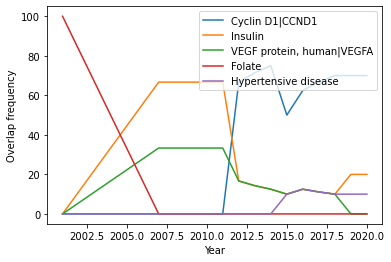

In [70]:
#https://www.kaggle.com/andyxie/matplotlib-plot-multiple-lines

def map_term_to_year(term_data,years):
    yearDic={}
    for y in years:
        yearDic[y]=0
    for i,row in term_data.iterrows():
        #print(i,row['year'])
        yearDic[row['year']]=row['rel_counts']
    return list(yearDic.values())

term_list=master_df_top

x = list(master_df['year'].unique())

for i in range(0,len(master_df_top)):
    y_data = master_df[master_df['name']==term_list[i]][['rel_counts','year']]
    y = map_term_to_year(y_data,x)
    plt.plot(x, y,label=term_list[i])

plt.legend(loc="upper right")
plt.xlabel('Year')
plt.ylabel('Overlap frequency')

plt.savefig(qterm1.replace(' ','_')+'__'+qterm2.replace(' ','_')+'.png',dpi=1000)

In [24]:
overlap_df

,triple_x,subject_name_x,subject_type_x,subject_id_x,predicate_x,object_name_x,object_type_x,object_id_x,localCount_x,localTotal_x,...,object_type_y,object_id_y,localCount_y,localTotal_y,globalCount_y,globalTotal_y,odds_y,pval_y,pmids_y,set_y
0,sildenafil:TREATS:Erectile dysfunction,sildenafil,orch,C0529793,TREATS,Erectile dysfunction,dsyn,C0242350,5,226,...,dsyn,C0028754,2,226,14,6862606,4376.653061,1.295000e-07,18624963 20574431,"(premature_ejaculation)_and_((""1900""[date_-_cr..."
1,vardenafil:TREATS:Erectile dysfunction,vardenafil,orch,C0971579,TREATS,Erectile dysfunction,dsyn,C0242350,3,226,...,dsyn,C0028754,2,226,14,6862606,4376.653061,1.295000e-07,18624963 20574431,"(premature_ejaculation)_and_((""1900""[date_-_cr..."
2,Diabetes:PREDISPOSES:Erectile dysfunction,Diabetes,dsyn,C0011847,PREDISPOSES,Erectile dysfunction,dsyn,C0242350,2,226,...,dsyn,C0028754,2,226,14,6862606,4376.653061,1.295000e-07,18624963 20574431,"(premature_ejaculation)_and_((""1900""[date_-_cr..."
3,Overactive Bladder:PREDISPOSES:Erectile dysfun...,Overactive Bladder,dsyn,C0878773,PREDISPOSES,Erectile dysfunction,dsyn,C0242350,2,226,...,dsyn,C0028754,2,226,14,6862606,4376.653061,1.295000e-07,18624963 20574431,"(premature_ejaculation)_and_((""1900""[date_-_cr..."
4,Prolactin:STIMULATES:SLC4A1,Prolactin,aapp,C0033371,STIMULATES,SLC4A1,gngm,6521,2,226,...,horm,C0023607,2,226,2,6862606,30636.625000,6.500000e-09,26399566,"(premature_ejaculation)_and_((""1900""[date_-_cr..."
5,Prolactin:STIMULATES:SLC4A1,Prolactin,aapp,C0033371,STIMULATES,SLC4A1,gngm,6521,2,226,...,horm,C0039601,2,226,2,6862606,30636.625000,6.500000e-09,26399566,"(premature_ejaculation)_and_((""1900""[date_-_cr..."
6,Prolactin:STIMULATES:SLC4A1,Prolactin,aapp,C0033371,STIMULATES,SLC4A1,gngm,6521,2,226,...,horm,C0733758,2,226,2,6862606,30636.625000,6.500000e-09,26399566,"(premature_ejaculation)_and_((""1900""[date_-_cr..."
7,Epilepsy:COEXISTS_WITH:Sexual Dysfunction,Epilepsy,dsyn,C0014544,COEXISTS_WITH,Sexual Dysfunction,dsyn,C0549622,2,226,...,dsyn,C0030567,5,226,24,6862606,6469.251508,4.395951e-18,14742099 20205139 25466402,"(premature_ejaculation)_and_((""1900""[date_-_cr..."
8,Epilepsy:COEXISTS_WITH:Sexual Dysfunction,Epilepsy,dsyn,C0014544,COEXISTS_WITH,Sexual Dysfunction,dsyn,C0549622,2,226,...,dsyn,C0033581,3,226,4,6862606,23080.500000,0.000000e+00,26242047,"(premature_ejaculation)_and_((""1900""[date_-_cr..."
9,Epilepsy:COEXISTS_WITH:Sexual Dysfunction,Epilepsy,dsyn,C0014544,COEXISTS_WITH,Sexual Dysfunction,dsyn,C0549622,2,226,...,dsyn,C0856619,2,226,2,6862606,30636.625000,6.500000e-09,25971858,"(premature_ejaculation)_and_((""1900""[date_-_cr..."


In [31]:
#check a sentence

triple='Prolactin:STIMULATES:SLC4A1'
pmid='26399566'

endpoint = "/sentence/"
url = f"{API_URL}{endpoint}"
params = {
    "pmid": pmid,
}
response = requests.post(url, data=json.dumps(params))
res = response.json()
pub_df = (
    pd.json_normalize(res['data'])
)
pub_df[['SUBJECT_NAME','PREDICATE','OBJECT_NAME','SENTENCE']]

,SUBJECT_NAME,PREDICATE,OBJECT_NAME,SENTENCE
0,Prolactin,STIMULATES,SLC4A1,Levels of prolactin were significantly increas...
1,Fetal Resorption,COEXISTS_WITH,Infertility,"In addition, the treatment markedly increased ..."
2,SLC4A1,INHIBITS,Luteinizing Hormone,A significant decline in the number of spermat...
3,SLC4A1,INHIBITS,Testosterone,A significant decline in the number of spermat...
4,SLC4A1,INHIBITS,Follicle Stimulating Hormone,A significant decline in the number of spermat...
5,Prolactin,STIMULATES,SLC4A1,Levels of prolactin were significantly increas...
6,SLC4A1,INHIBITS,Luteinizing Hormone,A significant decline in the number of spermat...
7,SLC4A1,INHIBITS,Follicle Stimulating Hormone,A significant decline in the number of spermat...
8,SLC4A1,INHIBITS,Testosterone,A significant decline in the number of spermat...


### Obesity and thyroid cancer

https://academic.oup.com/jcem/article/105/7/dgaa250/5835841

In [5]:
q1=['obesity']
q2=['thyroid cancer']

overlap_df = overlap(q1,q2)
overlap_counts = overlap_df.groupby(['object_type_x'])['object_name_x'].value_counts()
overlap_counts

object_type_x  object_name_x                     
aapp           ghrelin                               10
               PPAR gamma                             5
               Proto-Oncogene Proteins c-akt|AKT1     4
               receptor                               3
               FRAP1 protein, human|MTOR              1
               Sex Hormone-Binding Globulin           1
               Somatostatin                           1
dsyn           Syndrome                              26
               Crohn's disease                        2
               Hypothyroidism                         2
               Thrombophilia                          2
               Thrombus                               1
gngm           Proto-Oncogene Proteins c-akt|AKT1     4
               PPAR gamma                             3
               ghrelin                                3
               Sex Hormone-Binding Globulin           2
               MAPKAP1                                